<a href="https://colab.research.google.com/github/kevinhoxha/IMDb-Machine-Learning/blob/master/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Based on https://livebook.manning.com/book/deep-learning-with-python/chapter-3/




In [1]:
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import losses
from keras import metrics
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print("train_data =", train_data.shape)
print("x_train =", x_train.shape)
print("test_data =", test_data.shape)
print("x_test =", x_test.shape)

#word_index = imdb.get_word_index()
#reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[2]])
#for i in range(length):
#  if (x_train[2, train_data[2][i]] != 1.0):
#    print(x_train[2, train_data[2][i]])


Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step
train_data = (25000,)
x_train = (25000, 10000)
test_data = (25000,)
x_test = (25000, 10000)


In [2]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [3]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 122us/step - loss: 0.4660 - binary_accuracy: 0.8222 - val_loss: 0.3453 - val_binary_accuracy: 0.8835
Epoch 2/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.2685 - binary_accuracy: 0.9092 - val_loss: 0.2877 - val_binary_accuracy: 0.8894
Epoch 3/20
25000/25000 [==============================] - 3s 108us/step - loss: 0.2063 - binary_accuracy: 0.9270 - val_loss: 0.2847 - val_binary_accuracy: 0.8869
Epoch 4/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.1723 - binary_accuracy: 0.9400 - val_loss: 0.2998 - val_binary_accuracy: 0.8822
Epoch 5/20
25000/25000 [==============================] - 3s 108us/step - loss: 0.1507 - binary_accuracy: 0.9462 - val_loss: 0.3057 - val_binary_accuracy: 0.8806
Epoch 6/20
25000/25000 [==============================] - 3s 107us/step - loss: 0.1314 - binary_accuracy: 0.9542 - val_loss: 0.3472 - val_bi

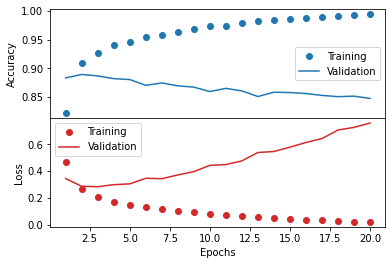

In [4]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(acc_values) + 1)

fig, axs = plt.subplots(2, sharex=True, sharey=False, gridspec_kw={'hspace': 0})

color = 'tab:red'
axs[1].plot(epochs, loss_values, 'bo', label='Training', color=color)
axs[1].plot(epochs, val_loss_values, 'b', label='Validation', color=color)
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epochs')
axs[1].legend()

color = 'tab:blue'
axs[0].plot(epochs, acc_values, 'bo', label='Training', color=color)
axs[0].plot(epochs, val_acc_values, 'b', label='Validation', color=color)
axs[0].set_ylabel('Accuracy')
axs[0].legend()

plt.show()
